# 템플릿 매칭

## Haar based Cascade Classifier 

Haar based Cascade Classifier는 머신러닝을 이용한 물체 인식 방법론이다. 머신러닝 기법으로 AdaBoost를 사용했고, 이에 대한 내용은 추후에 학습 할 것이다. 이 분류기는 얼굴이미지에서 눈, 얼굴 등의 부위를 찾는데 주로 이용된다. 이미 학습된 모델을 OpenCV 에서 제공하고 있다. 학습 시킬 필요없이 다음과 같이 다운로드 받아 바로 사용할 수 있다. 

아래 코드는 이미지에서 눈을 찾아내는 예이다. 

In [1]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2019-07-13 17:30:18--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  2.82MB/s    in 0.3s    

2019-07-13 17:30:19 (2.82 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]

--2019-07-13 17:30:19--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (3

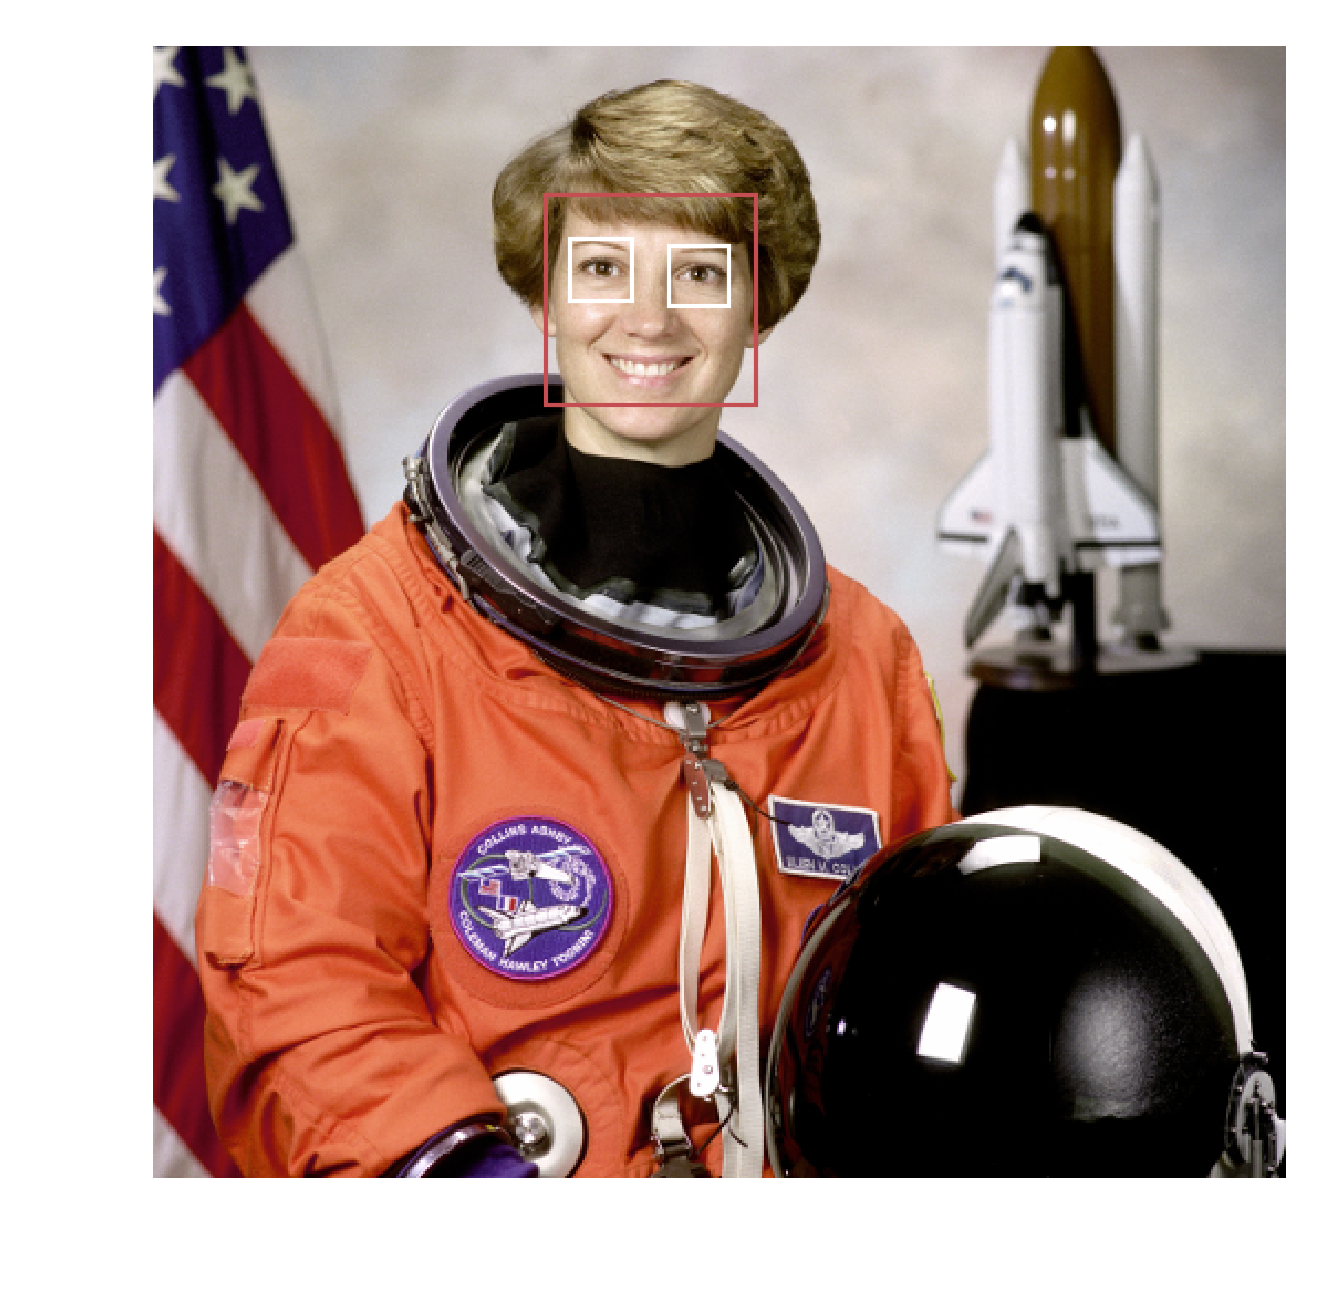

In [2]:
import cv2
from skimage.data import astronaut
from matplotlib.patches import Rectangle

img = astronaut()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)

face = faces[0]
eye1 = eyes[0]
eye2 = eyes[1]

fig, ax = plt.subplots()
plt.imshow(img, cmap=plt.cm.bone)
plt.axis("off")
plt.grid(False)
ax.add_patch(Rectangle((face[0], face[1]), face[2], face[3], fill=False, color="r"))
ax.add_patch(Rectangle((eye1[0], eye1[1]), eye1[2], eye1[3], fill=False))
ax.add_patch(Rectangle((eye2[0], eye2[1]), eye2[2], eye2[3], fill=False))
plt.show()